In [175]:
import numpy as np
import pandas as pd
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

# data = pd.read_csv('1finfin.csv', header=None)
data = pd.read_csv('1finfin.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
y_0 = np.array(y, copy=True)  
y_0[y_0 == 1] = 0
y_0[y_0 == 2] = 1
y_1 = np.array(y, copy=True)
y_1[y_1 == 2] = 1
y_2 = np.array(y, copy=True)

y_2[y_2 == 2] = 0

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
    accurate = 0
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
        else:
            accurate += 1
    return W, b, accurate/len(X)
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    errors = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b, error_count = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        errors.append(error_count)
    return boundary_lines, errors

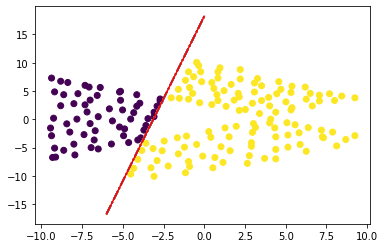

In [199]:
# Import the necessary modules
import matplotlib.pyplot as plt
# Train the perceptron algorithm
boundary_lines, errors = trainPerceptronAlgorithm(X, y_1)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y_1)

x = np.linspace(-6,0,100)

for i in range (25):
    y = boundary_lines[2*i+10][0]*x + boundary_lines[2*i+10][1]
    plt.plot(x,y, '-.')

y = boundary_lines[99][0]*x + boundary_lines[99][1]
plt.plot(x,y, '-r')
plt.show()

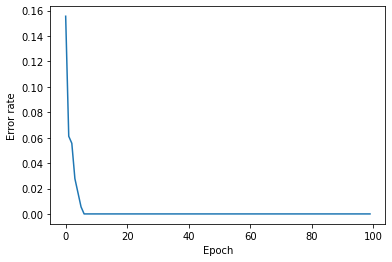

In [200]:
# Plot the error rate
for i in range(len(errors)):
    errors[i] = 1-errors[i]
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.show()

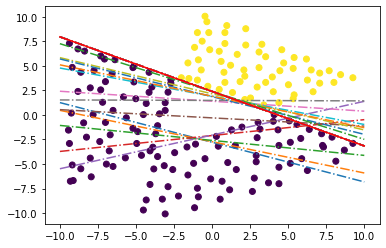

In [201]:
boundary_lines1, errors1 = trainPerceptronAlgorithm(X, y_0)


# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y_0)

x = np.linspace(-10,10,100)

for i in range (25):
    y = boundary_lines1[2*i+10][0]*x + boundary_lines1[2*i+10][1]
    plt.plot(x,y, '-.')

y = boundary_lines1[99][0]*x + boundary_lines1[99][1]
plt.plot(x,y, '-r')
plt.show()

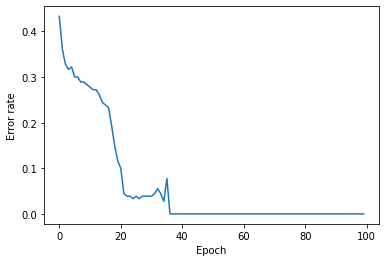

In [202]:
# Plot the error rate
for i in range(len(errors)):
    errors1[i] = 1-errors1[i]
plt.plot(errors1)
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.show()

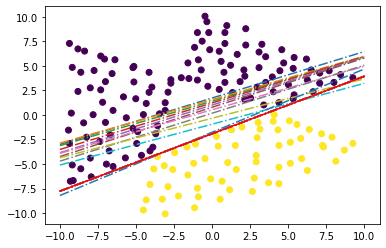

In [203]:
boundary_lines2, errors2 = trainPerceptronAlgorithm(X, y_2)


# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y_2)

x = np.linspace(-10,10,100)

for i in range (25):
    y = boundary_lines2[2*i+10][0]*x + boundary_lines2[2*i+10][1]
    plt.plot(x,y, '-.')

y = boundary_lines2[99][0]*x + boundary_lines2[99][1]
plt.plot(x,y, '-r')
plt.show()

[0.5055555555555555, 0.3388888888888889, 0.2944444444444444, 0.27222222222222225, 0.26111111111111107, 0.25555555555555554, 0.25555555555555554, 0.25555555555555554, 0.2222222222222222, 0.2055555555555556, 0.2055555555555556, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19444444444444442, 0.18333333333333335, 0.18888888888888888, 0.18333333333333335, 0.1777777777777778, 0.17222222222222228, 0.15000000000000002, 0.1444444444444445, 0.12777777777777777, 0.12777777777777777, 0.1166666666666667, 0.11111111111111116, 0.08333333333333337, 0.06666666666666665, 0.050000000000000044, 0.03888888888888886, 0.03888888888888886, 0.011111111111111072, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

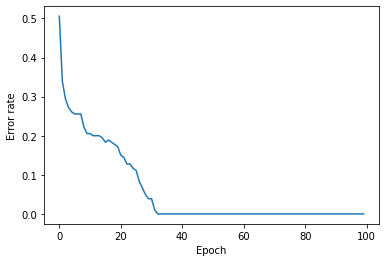

In [204]:
# Plot the error rate
for i in range(len(errors)):
    errors2[i] = 1-errors2[i]
print(errors2)
plt.plot(errors2)
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.show()

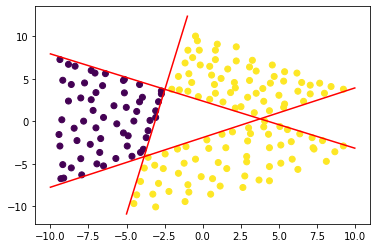

In [205]:
plt.scatter(X[:, 0], X[:, 1], c=y_1)
x = np.linspace(-10,10,180)

y = boundary_lines2[99][0]*x + boundary_lines2[99][1]
plt.plot(x,y, '-r')


y = boundary_lines1[99][0]*x + boundary_lines1[99][1]
plt.plot(x,y, '-r')

x = np.linspace(-5,-1,180)
y = boundary_lines[99][0]*x + boundary_lines[99][1]
plt.plot(x,y, '-r')
plt.show()